# **ML PROCESS - Air Quality**
---
**2 - Data Understanding (EDA)**

In [2]:
# Import the required libraries
import yaml
import joblib
import numpy as np
import pandas as pd

# Need to be installed.
import seaborn as sns
import scipy.stats as scs
import matplotlib.pyplot as plt

## **1 - Configuration File**
---

In [3]:
# Function to load configuration parameter.
def load_config(path_config):
    """
    Load the configuration file.

    Parameters:
    -----------
    config_path : str
        Configuration file location.

    Returns:
    --------
    params : dict
        Loaded configuration file.
    """

    # Try to load config.yaml file.
    try:
        with open(path_config, 'r') as file:
            params = yaml.safe_load(file)
    except FileNotFoundError as err:
        raise RuntimeError(f"Configuration file not found in {path_config}")

    return params

In [4]:
# Load the config.yaml
PATH_CONFIG = "../config/config.yaml"
config = load_config(PATH_CONFIG)

In [5]:
# Check the configuration parameters.
config

{'columns_datetime': ['tanggal'],
 'columns_int': ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max'],
 'columns_object': ['stasiun', 'critical', 'category'],
 'features': ['stasiun', 'pm10', 'pm25', 'so2', 'co', 'o3', 'no2'],
 'label': 'category',
 'label_categories': ['BAIK', 'SEDANG', 'TIDAK SEHAT'],
 'label_categories_new': ['BAIK', 'TIDAK BAIK'],
 'path_joined_data': '../data/interim/joined_dataset.pkl',
 'path_raw_data': '../data/raw/',
 'path_test_set': ['../data/interim/X_test.pkl', '../data/interim/y_test.pkl'],
 'path_train_set': ['../data/interim/X_train.pkl',
  '../data/interim/y_train.pkl'],
 'path_valid_set': ['../data/interim/X_valid.pkl',
  '../data/interim/y_valid.pkl'],
 'path_validated_data': '../data/interim/validated_data.pkl',
 'range_co': [-1, 47],
 'range_no2': [-1, 65],
 'range_o3': [-1, 151],
 'range_pm10': [-1, 179],
 'range_pm25': [-1, 174],
 'range_so2': [-1, 82],
 'range_stasiun': ['DKI1 (Bunderan HI)',
  'DKI2 (Kelapa Gading)',
  'DKI3 (Jagakarsa)',
  'DKI4

## **2 - Load Data**
---
**Note** : Do EDA only on the train set.

In [6]:
# Load the train set.
X_train = joblib.load(config["path_train_set"][0])
y_train = joblib.load(config["path_train_set"][1])

In [7]:
# Join X_train and y_train.
dataset = pd.concat(
    [X_train, y_train],
    axis = 1
)

In [8]:
# Check the joined train set.
dataset

,stasiun,pm10,pm25,so2,co,o3,no2,category
224,DKI3 (Jagakarsa),50,76,20,8,71,15,SEDANG
1712,DKI2 (Kelapa Gading),33,58,42,11,43,19,SEDANG
1028,DKI4 (Lubang Buaya),51,78,37,12,23,19,SEDANG
391,DKI3 (Jagakarsa),46,-1,17,17,41,10,BAIK
1547,DKI1 (Bunderan HI),68,102,31,13,20,30,TIDAK SEHAT
...,...,...,...,...,...,...,...,...
132,DKI5 (Kebon Jeruk) Jakarta Barat,35,62,31,7,12,16,SEDANG
1296,DKI3 (Jagakarsa),57,81,44,10,33,11,SEDANG
1431,DKI3 (Jagakarsa),42,65,51,7,36,10,SEDANG
189,DKI2 (Kelapa Gading),68,82,54,12,39,17,SEDANG


## **3 - Exploratory Data Analysis**
---
1. Missing value Check
2. Skewness Check
3. Data Split
4. Visualization
5. Hypothesis Test
6. Imbalanced Label Check
7. Outliers Check

### 3.1. Missing Value Check

In [9]:
# Replace the -1 values with NaN.
dataset = dataset.replace(-1, np.nan)

In [10]:
# Check the number of missing values.
dataset.isnull().sum()

stasiun      0
pm10        45
pm25        67
so2         73
co          12
o3          38
no2         17
category     0
dtype: int64

### 3.2. Skewness Check

In [11]:
# Fisher-Pearson Skew  values.
dataset.skew(numeric_only=True)

pm10   -0.183707
pm25    0.300536
so2     0.144430
co      1.683477
o3      1.413418
no2     0.860894
dtype: float64

**Insights:**
- `pm10` is left skewed, but not significant. The rest are right skewed.
- `co`, `o3`, and `no2` have skew values > 0.5, indicating a lot of outliers. We will impute using it's median.
- The rest will be imputed using it's mean.

### 3.3. Data Split
---
Split the data by it's class.

In [15]:
dataset_baik = dataset[dataset["category"] == "BAIK"].copy()
dataset_tidak_baik = dataset[dataset["category"] != "BAIK"].copy()

In [16]:
# Kelas 1 => BAIK.
dataset_baik.describe()

,pm10,pm25,so2,co,o3,no2
count,142.000000,110.000000,149.000000,151.000000,148.000000,141.000000
mean,28.683099,39.472727,25.724832,8.973510,26.736486,10.638298
std,7.640290,9.000213,10.586107,4.203089,11.019686,5.858177
min,14.000000,13.000000,3.000000,2.000000,9.000000,3.000000
25%,23.000000,34.000000,18.000000,7.000000,17.750000,6.000000
50%,28.000000,41.000000,24.000000,8.000000,25.500000,10.000000
75%,33.000000,47.000000,36.000000,11.000000,36.000000,14.000000
max,50.000000,50.000000,50.000000,28.000000,49.000000,35.000000


In [17]:
# Kelas 0 => SEDANG & TIDAK SEHAT.
dataset_tidak_baik.describe()

,pm10,pm25,so2,co,o3,no2
count,1263.000000,1273.000000,1228.000000,1287.000000,1264.000000,1292.000000
mean,55.535234,82.825609,36.136808,11.988345,32.612342,20.245356
std,12.754918,22.335832,12.195000,4.823222,14.693384,8.784943
min,23.000000,19.000000,2.000000,3.000000,9.000000,1.000000
25%,49.000000,67.000000,27.000000,9.000000,23.000000,14.000000
50%,56.000000,81.000000,37.000000,11.000000,29.000000,19.000000
75%,63.000000,96.000000,45.000000,14.000000,39.000000,25.000000
max,100.000000,174.000000,81.000000,44.000000,151.000000,65.000000


**insights:**
- `pm10` and `pm25` `mean` between class 0 and 1 have a significantt difference. We will impute using `class mean`.
- `so2` `mean` between class 0 and 1 have a slight difference. We will be impute using the mean.
- `co`, `o3`, and `no2` `median` betweer class 0 and 1 have a slight difference. We will impute using the median.

### 3.4. Visualization

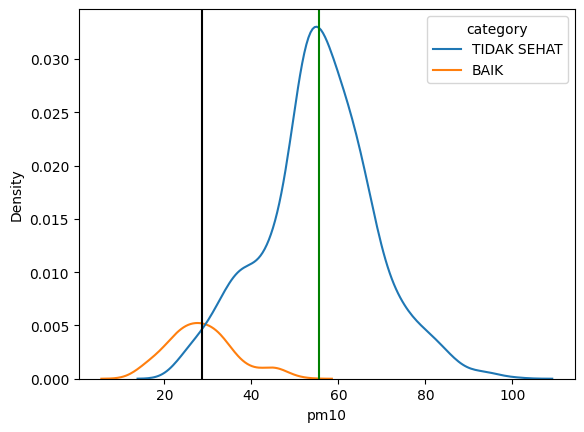

In [20]:
# pm10 column distribution.
sns.kdeplot(
    data = dataset.replace("SEDANG", "TIDAK SEHAT"),
    x = "pm10",
    hue = "category"
)

plt.axvline(dataset_tidak_baik["pm10"].mean(), 0, 1, color='g')
plt.axvline(dataset_baik["pm10"].mean(), 0, 1, color='k')
plt.show()

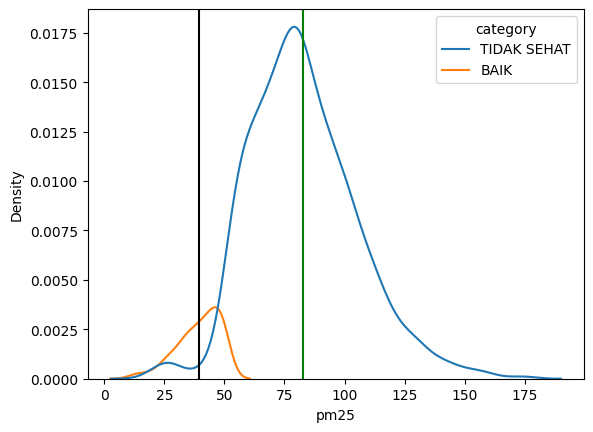

In [21]:
# pm25 column distribution.
sns.kdeplot(
    data = dataset.replace("SEDANG", "TIDAK SEHAT"),
    x = "pm25",
    hue = "category"
)

plt.axvline(dataset_tidak_baik["pm25"].mean(), 0, 1, color='g')
plt.axvline(dataset_baik["pm25"].mean(), 0, 1, color='k')
plt.show()

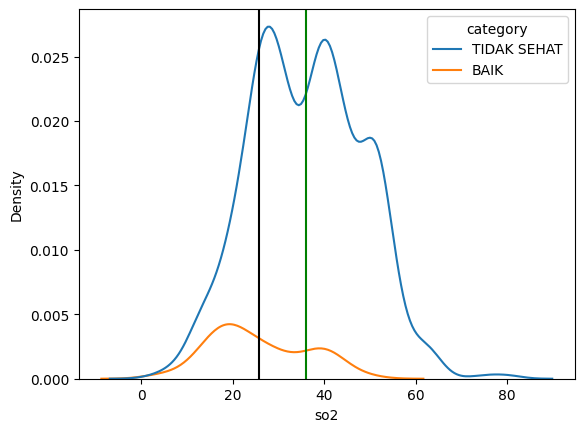

In [22]:
# so2 column distribution.
sns.kdeplot(
    data = dataset.replace("SEDANG", "TIDAK SEHAT"),
    x = "so2",
    hue = "category"
)

plt.axvline(dataset_tidak_baik["so2"].mean(), 0, 1, color='g')
plt.axvline(dataset_baik["so2"].mean(), 0, 1, color='k')
plt.show()

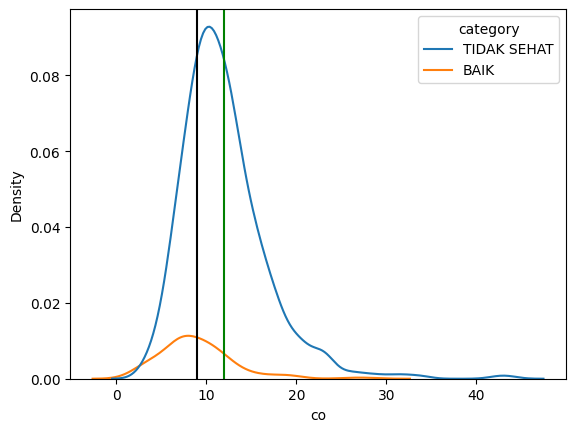

In [23]:
# co column distribution.
sns.kdeplot(
    data = dataset.replace("SEDANG", "TIDAK SEHAT"),
    x = "co",
    hue = "category"
)

plt.axvline(dataset_tidak_baik["co"].mean(), 0, 1, color='g')
plt.axvline(dataset_baik["co"].mean(), 0, 1, color='k')
plt.show()

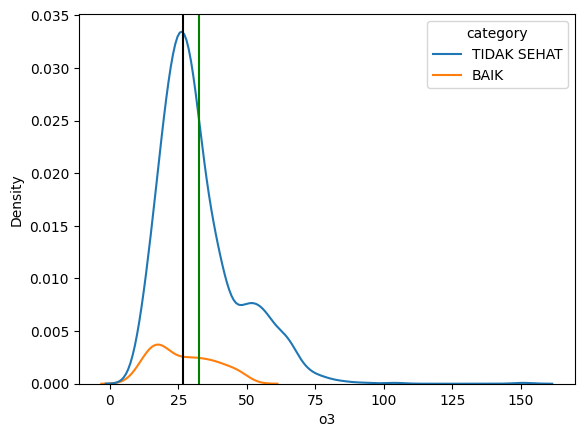

In [24]:
# o3 column distribution.
sns.kdeplot(
    data = dataset.replace("SEDANG", "TIDAK SEHAT"),
    x = "o3",
    hue = "category"
)

plt.axvline(dataset_tidak_baik["o3"].mean(), 0, 1, color='g')
plt.axvline(dataset_baik["o3"].mean(), 0, 1, color='k')
plt.show()

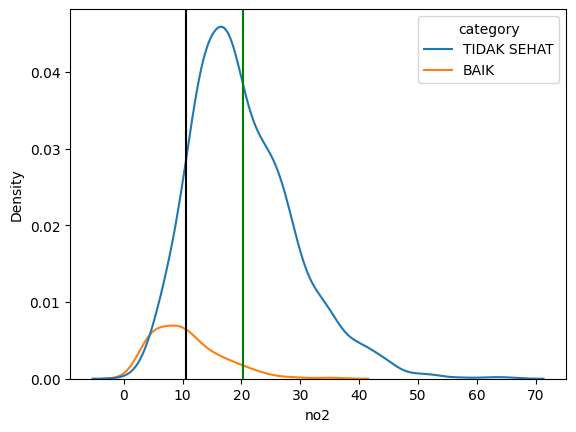

In [25]:
# no2 column distribution.
sns.kdeplot(
    data = dataset.replace("SEDANG", "TIDAK SEHAT"),
    x = "no2",
    hue = "category"
)

plt.axvline(dataset_tidak_baik["no2"].mean(), 0, 1, color='g')
plt.axvline(dataset_baik["no2"].mean(), 0, 1, color='k')
plt.show()

**Check the correlation**

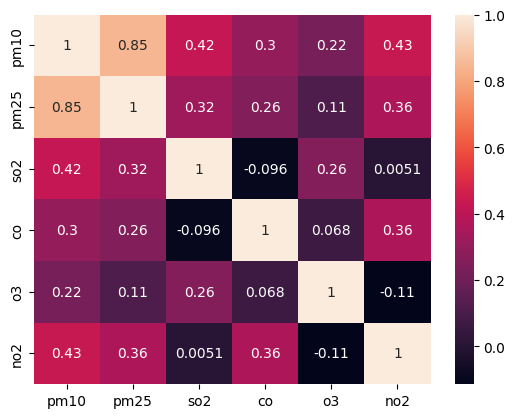

In [26]:
# Pearson Correlation.
sns.heatmap(
    dataset.corr(numeric_only=True),
    annot=True
)
plt.show()

### 3.5. Hyphothesis Test
---
T-Test (to check mean between 2 variables)

**Note:**
- $h_{0}$ (null hyphothesis): mean of class 0 == mean of class 1.
- $h_{1}$ (alternative hyphothesis): mean of class 0 != mean of class 1.
- $h_{0}$ and $h_{1}$ is *mutally exclusive* (if $h_{0}$ is true, $h_{1}$ is false, and vice versa).
- The goal of the test is to determine whether to reject $h_{0}$.

In [27]:
# pm10 t-value.
scs.ttest_ind(
    dataset_baik[dataset_baik["pm10"].isnull() != True].pm10,
    dataset_tidak_baik[dataset_tidak_baik["pm10"].isnull() != True].pm10
)

TtestResult(statistic=np.float64(-24.59080536541546), pvalue=np.float64(2.5395810342479216e-111), df=np.float64(1403.0))

In [28]:
# t-critical for alpha=0.05 and dof=n-2
scs.t.ppf(0.05, df=(len(dataset) - 2))

np.float64(-1.6459066313849768)

**Insights:**
- if $t_{value} < t_{critical}$ and $p_{value} < 0.05$, then $h_{0}$ is rejected.
- Summary: `pm10` mean between class 0 and class 1 is statistically significant.

In [29]:
# pm25 t-value.
scs.ttest_ind(
    dataset_baik[dataset_baik["pm25"].isnull() != True].pm25,
    dataset_tidak_baik[dataset_tidak_baik["pm25"].isnull() != True].pm25
)

TtestResult(statistic=np.float64(-20.21008299408094), pvalue=np.float64(8.970166994586148e-80), df=np.float64(1381.0))

In [30]:
# so2 t-value.
scs.ttest_ind(
    dataset_baik[dataset_baik["so2"].isnull() != True].so2,
    dataset_tidak_baik[dataset_tidak_baik["so2"].isnull() != True].so2
)

TtestResult(statistic=np.float64(-9.975044818123273), pvalue=np.float64(1.1307758667085769e-22), df=np.float64(1375.0))

In [31]:
# co t-value.
scs.ttest_ind(
    dataset_baik[dataset_baik["co"].isnull() != True].co,
    dataset_tidak_baik[dataset_tidak_baik["co"].isnull() != True].co
)

TtestResult(statistic=np.float64(-7.359563815808657), pvalue=np.float64(3.0930217307827864e-13), df=np.float64(1436.0))

In [32]:
# o3 t-value.
scs.ttest_ind(
    dataset_baik[dataset_baik["o3"].isnull() != True].o3,
    dataset_tidak_baik[dataset_tidak_baik["o3"].isnull() != True].o3
)

TtestResult(statistic=np.float64(-4.7116672904230095), pvalue=np.float64(2.6995642014876233e-06), df=np.float64(1410.0))

In [33]:
# no2 t-value.
scs.ttest_ind(
    dataset_baik[dataset_baik["no2"].isnull() != True].no2,
    dataset_tidak_baik[dataset_tidak_baik["no2"].isnull() != True].no2
)

TtestResult(statistic=np.float64(-12.679413021282476), pvalue=np.float64(5.42632205277746e-35), df=np.float64(1431.0))

### 3.6. Imbalanced Label Check

In [34]:
# Check the proportion of the label.
dataset["category"].value_counts(normalize=True)

category
SEDANG         0.720000
TIDAK SEHAT    0.175862
BAIK           0.104138
Name: proportion, dtype: float64

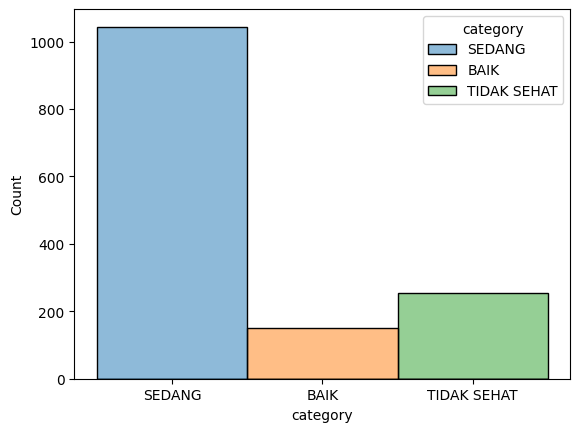

In [35]:
sns.histplot(
    data = dataset,
    x = "category",
    hue = "category"
)
plt.show()

### 3.7. Outliers Check

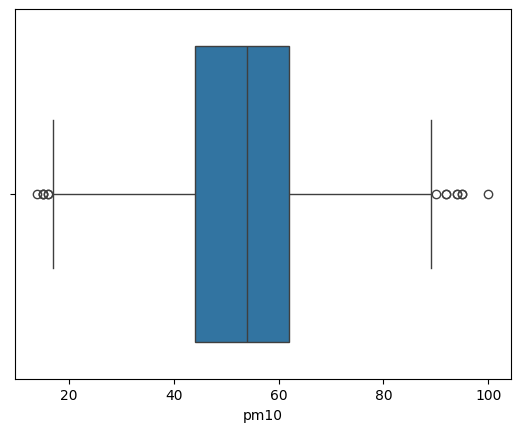

In [36]:
# pm10 boxplot.
sns.boxplot(
    data = dataset,
    x = "pm10"
)
plt.show()

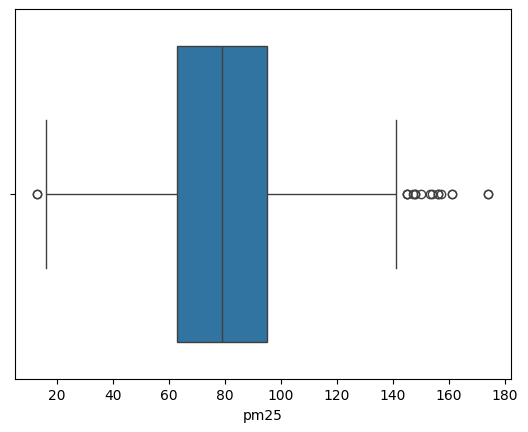

In [37]:
# pm25 boxplot.
sns.boxplot(
    data = dataset,
    x = "pm25"
)
plt.show()

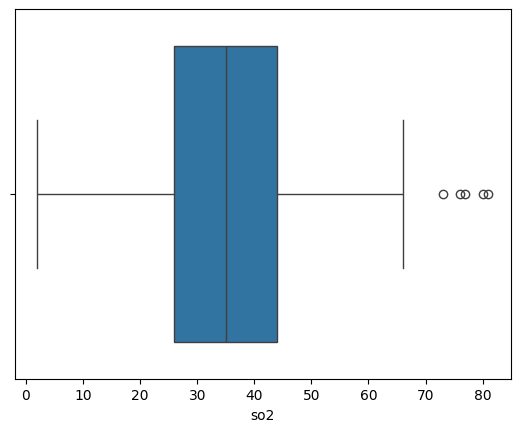

In [38]:
# so2 boxplot.
sns.boxplot(
    data = dataset,
    x = "so2"
)
plt.show()

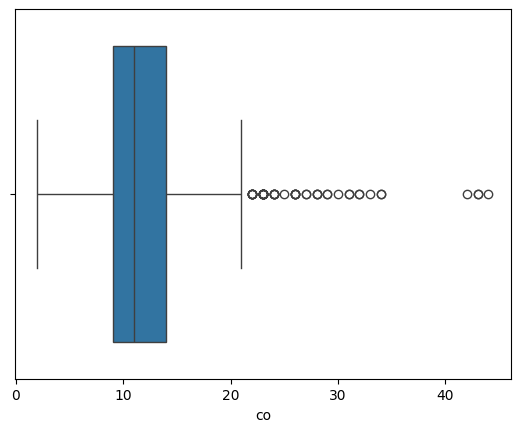

In [39]:
# co boxplot.
sns.boxplot(
    data = dataset,
    x = "co"
)
plt.show()

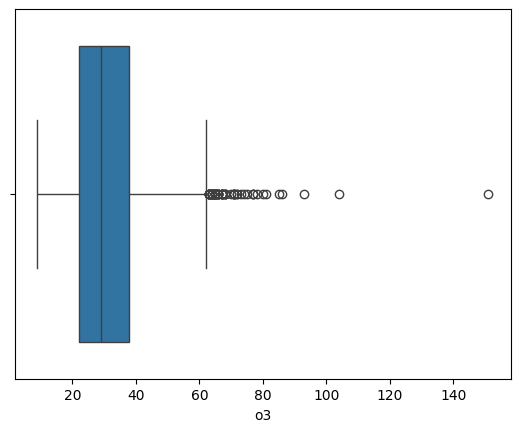

In [40]:
# o3 boxplot.
sns.boxplot(
    data = dataset,
    x = "o3"
)
plt.show()

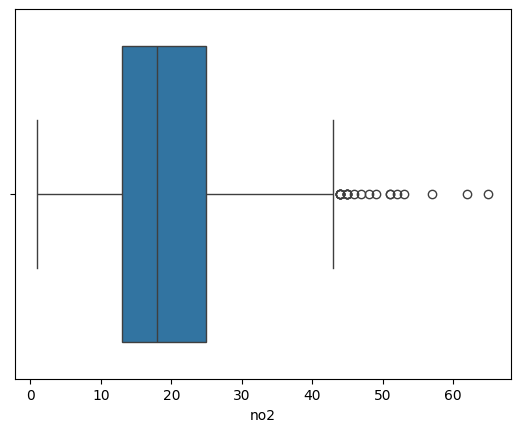

In [41]:
# no2 boxplot.
sns.boxplot(
    data = dataset,
    x = "no2"
)
plt.show()

**Summary:**
1. Missing Value Handling
   - `pm10` and `pm25`: class mean
   - `so2`: mean
   - `co`, `o3`, and `no2` : median
2. Join label `SEDANG` and `TIDAK SEHAT` into `TIDAK BAIK`
3. Label balancing `BAIK` and `TIDAK BAIK`
4. Outliers removal